# 03_02 Autoencoder Analysis

**Chapter 3**: Variational Autoencoders | **Notebook 2 of 6**

This notebook analyzes a trained autoencoder by:
- Reconstructing test images
- Visualizing the 2D latent space
- Generating new images from latent space samples

## Imports

In [1]:
import tensorflow as tf

# ═══════════════════════════════════════════════════════════════════════════════
# GPU MEMORY CONFIGURATION
# ═══════════════════════════════════════════════════════════════════════════════
# Enable memory growth to prevent TensorFlow from allocating all GPU memory.
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    for gpu in gpus:
        tf.config.experimental.set_memory_growth(gpu, True)
    print(f"GPU(s) available: {[gpu.name for gpu in gpus]}")
else:
    print("WARNING: No GPU detected, running on CPU")

2026-01-04 04:54:59.460337: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/cataluna84/Workspace-Antigravity/Generative_Deep_Learning/.venv/lib/python3.13/site-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


GPU(s) available: ['/physical_device:GPU:0']


In [2]:
# ═══════════════════════════════════════════════════════════════════════════════
# IMPORTS
# ═══════════════════════════════════════════════════════════════════════════════

# Standard library
import sys
import os

# Path setup for local imports
sys.path.insert(0, '..')
sys.path.insert(0, '../..')

# Third-party libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Local imports
from src.models.AE import Autoencoder
from src.utils.loaders import load_mnist, load_model

In [3]:
# ═══════════════════════════════════════════════════════════════════════════════
# GLOBAL CONFIGURATION
# ═══════════════════════════════════════════════════════════════════════════════

# Model identification
SECTION = 'vae'
RUN_ID = '0001'
DATA_NAME = 'digits'

# Directory paths
RUN_FOLDER = f'../run/{SECTION}/{RUN_ID}_{DATA_NAME}'

print(f"Loading model from: {RUN_FOLDER}")

Loading model from: ../run/vae/0001_digits


## Load Data

In [4]:
# Load MNIST dataset (preprocessed to [0,1] range)
(x_train, y_train), (x_test, y_test) = load_mnist()

## Load Model

In [5]:
# Load pre-trained autoencoder from run folder
AE = load_model(Autoencoder, RUN_FOLDER)

I0000 00:00:1767502513.053708    1384 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6094 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2070, pci bus id: 0000:01:00.0, compute capability: 7.5


## Reconstruct Original Images

2026-01-04 04:55:16.066662: I external/local_xla/xla/service/service.cc:163] XLA service 0x790048004ea0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2026-01-04 04:55:16.066725: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 2070, Compute Capability 7.5
2026-01-04 04:55:16.159243: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91701
2026-01-04 04:55:17.579869: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[10,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[10,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


I0000 00:00:1767502518.457644    4534 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2026-01-04 04:55:18.875745: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


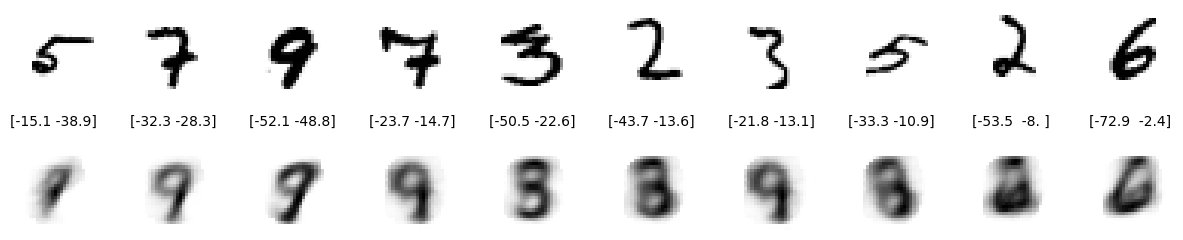

In [6]:
# ═══════════════════════════════════════════════════════════════════════════════
# RECONSTRUCTION VISUALIZATION
# ═══════════════════════════════════════════════════════════════════════════════
# Select random test images, encode to latent space, decode back, and compare.

n_to_show = 10
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]

# Encode to latent space
z_points = AE.encoder.predict(example_images)

# Decode back to image space
reconst_images = AE.decoder.predict(z_points)

# Display original images (top row) and reconstructions (bottom row)
fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_points[i],1)), fontsize=10, ha='center', transform=ax.transAxes)   
    ax.imshow(img, cmap='gray_r')

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    ax = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    ax.axis('off')
    ax.imshow(img, cmap='gray_r')

## Latent Space Visualization

2026-01-04 04:55:22.536674: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,32,28,28]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,1,28,28]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}
2026-01-04 04:55:22.740361: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[32,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$c

151/157 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

2026-01-04 04:55:24.575206: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:546] Omitted potentially buggy algorithm eng14{k25=2} for conv (f32[8,64,7,7]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,64,7,7]{3,2,1,0}, f32[64,64,3,3]{3,2,1,0}, f32[64]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false,"reification_cost":[]}


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step


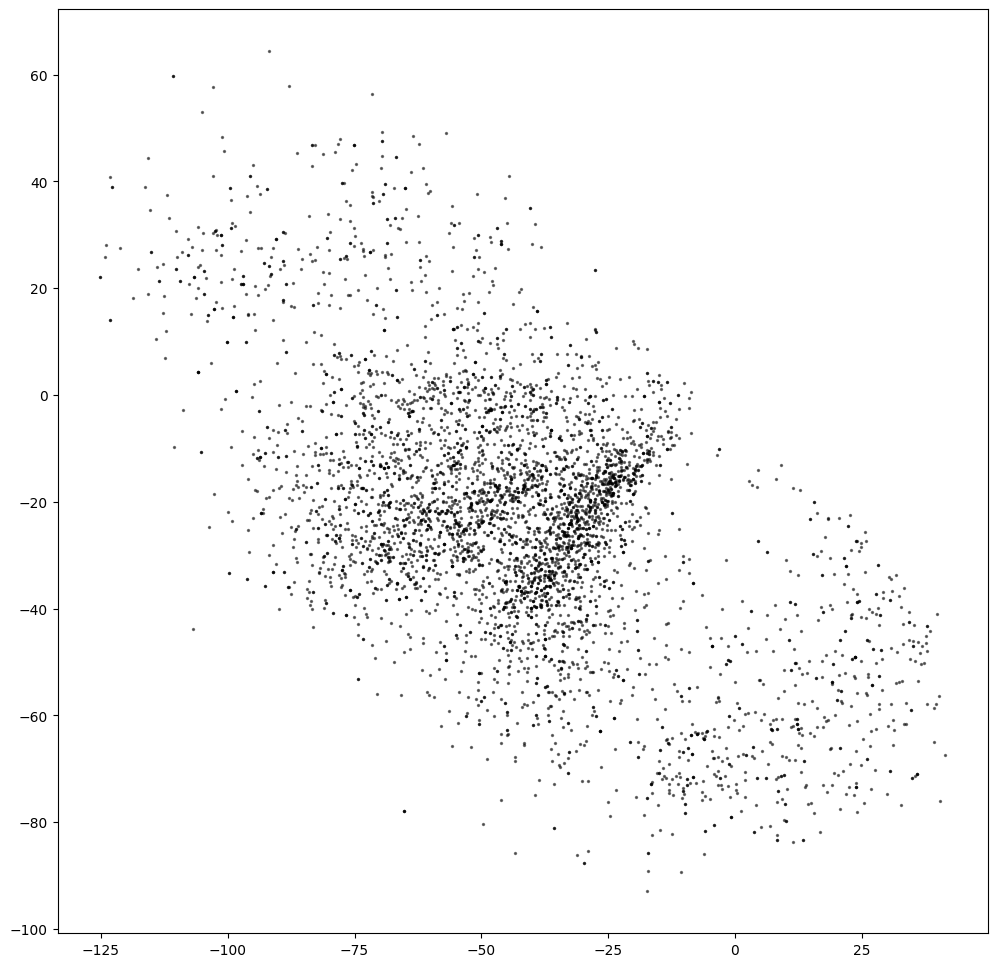

In [7]:
# ═══════════════════════════════════════════════════════════════════════════════
# LATENT SPACE SCATTER PLOT
# ═══════════════════════════════════════════════════════════════════════════════
# Encode test images and visualize 2D latent space distribution.

n_to_show = 5000
grid_size = 15
figsize = 12

# Sample random test images
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Encode to latent space
z_points = AE.encoder.predict(example_images)

# Get latent space bounds for later use
min_x = min(z_points[:, 0])
max_x = max(z_points[:, 0])
min_y = min(z_points[:, 1])
max_y = max(z_points[:, 1])

# Display scatter plot of latent encodings
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)
plt.show()

### Generate New Images from Latent Space

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


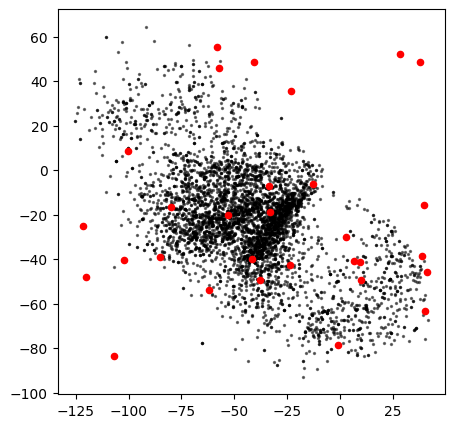

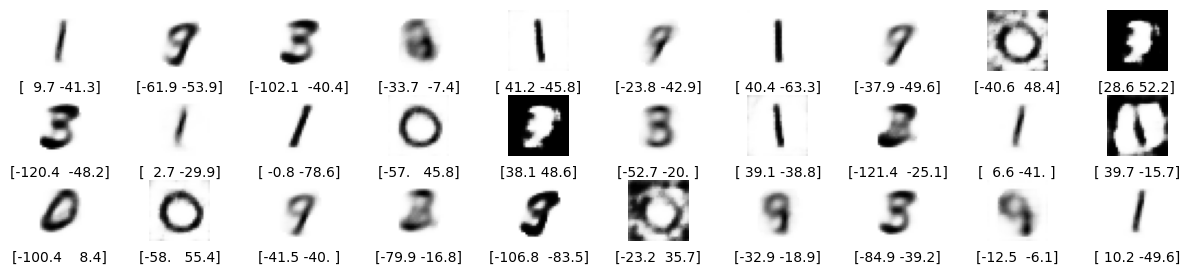

In [8]:
# ═══════════════════════════════════════════════════════════════════════════════
# RANDOM LATENT SPACE SAMPLING
# ═══════════════════════════════════════════════════════════════════════════════
# Sample random points from the latent space and decode to generate new images.

figsize = 5

# Show reference scatter plot
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1], c='black', alpha=0.5, s=2)

grid_size = 10
grid_depth = 3
figsize = 15

# Sample random points within latent space bounds
x = np.random.uniform(min_x,max_x, size = grid_size * grid_depth)
y = np.random.uniform(min_y,max_y, size = grid_size * grid_depth)
z_grid = np.array(list(zip(x, y)))

# Decode sampled points to generate images
reconst = AE.decoder.predict(z_grid)

# Overlay sampled points on scatter plot
plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'red', alpha=1, s=20)
plt.show()

# Display generated images
fig = plt.figure(figsize=(figsize, grid_depth))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(grid_size*grid_depth):
    ax = fig.add_subplot(grid_depth, grid_size, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, str(np.round(z_grid[i],1)), fontsize=10, ha='center', transform=ax.transAxes)
    
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


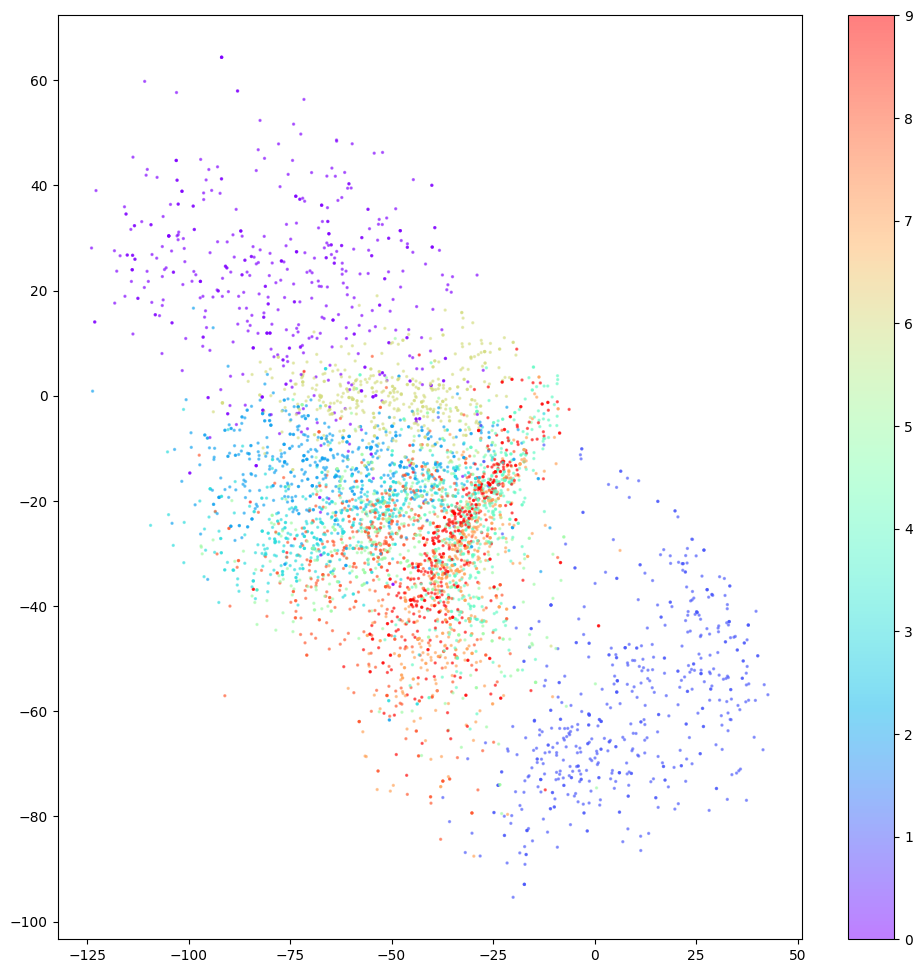

In [9]:
# ═══════════════════════════════════════════════════════════════════════════════
# LATENT SPACE BY DIGIT LABEL
# ═══════════════════════════════════════════════════════════════════════════════
# Visualize latent space with color-coded digit labels (0-9).

n_to_show = 5000
grid_size = 15
figsize = 12

# Sample random test images with their labels
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Encode to latent space
z_points = AE.encoder.predict(example_images)

# Scatter plot with rainbow colormap for digit labels
plt.figure(figsize=(figsize, figsize))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()
plt.show()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step


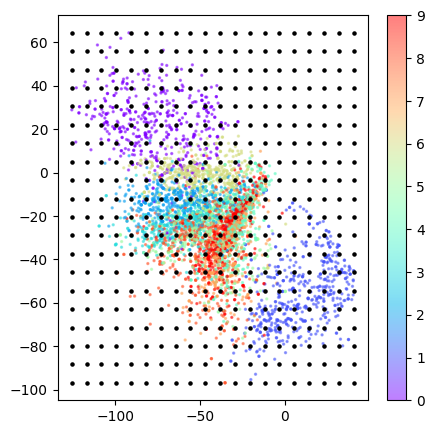

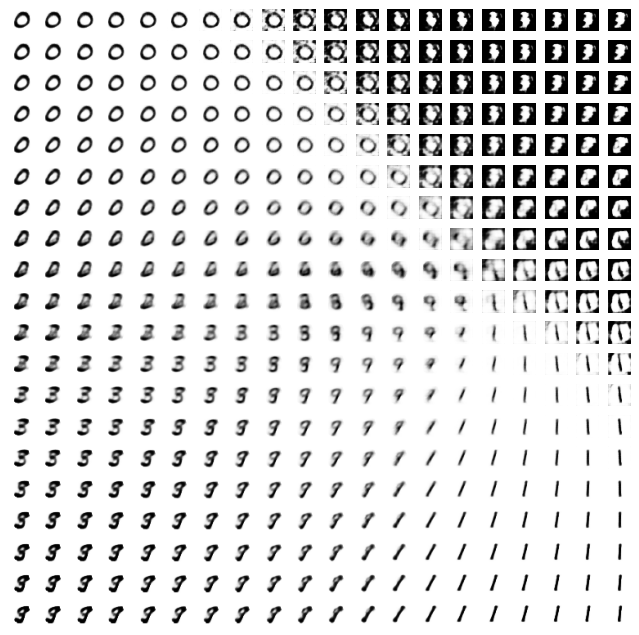

In [10]:
# ═══════════════════════════════════════════════════════════════════════════════
# LATENT SPACE GRID SAMPLING
# ═══════════════════════════════════════════════════════════════════════════════
# Create a uniform grid across the latent space and decode each point to
# visualize how the autoencoder interpolates between digit representations.

n_to_show = 5000
grid_size = 20
figsize = 8

# Sample test images for reference scatter plot
example_idx = np.random.choice(range(len(x_test)), n_to_show)
example_images = x_test[example_idx]
example_labels = y_test[example_idx]

# Encode to latent space
z_points = AE.encoder.predict(example_images)

# Display scatter with digit labels
plt.figure(figsize=(5, 5))
plt.scatter(z_points[:, 0] , z_points[:, 1] , cmap='rainbow' , c= example_labels
            , alpha=0.5, s=2)
plt.colorbar()

# Create uniform grid spanning the latent space
x = np.linspace(min(z_points[:, 0]), max(z_points[:, 0]), grid_size)
y = np.linspace(max(z_points[:, 1]), min(z_points[:, 1]), grid_size)
xv, yv = np.meshgrid(x, y)
xv = xv.flatten()
yv = yv.flatten()
z_grid = np.array(list(zip(xv, yv)))

# Decode grid points to generate images
reconst = AE.decoder.predict(z_grid)

# Overlay grid points on scatter plot
plt.scatter(z_grid[:, 0] , z_grid[:, 1], c = 'black', alpha=1, s=5)
plt.show()

# Display decoded images in a grid
fig = plt.figure(figsize=(figsize, figsize))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(grid_size**2):
    ax = fig.add_subplot(grid_size, grid_size, i+1)
    ax.axis('off')
    ax.imshow(reconst[i, :,:,0], cmap = 'Greys')

# Cleanup: Restart Kernel to Release GPU Memory

In [11]:
# ═══════════════════════════════════════════════════════════════════════════════
# CLEANUP: Restart kernel to fully release GPU memory
# ═══════════════════════════════════════════════════════════════════════════════
# TensorFlow/CUDA does not release GPU memory within a running Python process.
# Restarting the kernel is the only guaranteed way to free all GPU resources.
# Run this cell only after all work is complete and saved.

# import IPython
# print("Restarting kernel to release GPU memory...")
# IPython.Application.instance().kernel.do_shutdown(restart=True)